In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7feb81924630>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7feb7bc705f8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7feb7bc70780>)

In [5]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

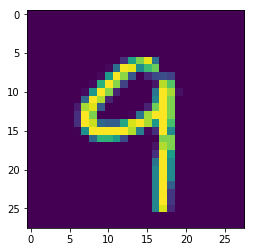

In [10]:
first_image = mnist.train.images[8]
first_image = np.array(first_image,dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [11]:
sess = tf.Session()
arr = tf.random_normal([5,5])
sess.run(arr)

array([[-1.31429684, -1.22421706,  0.38971519, -1.34392667, -0.4996711 ],
       [-0.89385873, -0.86297715, -0.88876259,  0.69002587,  0.83737582],
       [ 0.33612341,  0.27775478,  0.52103788, -1.07128   ,  0.51996928],
       [-0.47270182, -0.99888211, -0.06454355, -0.93967956,  0.11440656],
       [ 0.1648393 , -0.10666762,  1.40834236, -0.9651596 ,  0.48925722]], dtype=float32)

In [12]:
with tf.Session() as sess:
    arr = tf.random_normal([5,4])
    print(arr.eval())

[[-0.60022187  0.23918197 -0.25435638  0.12729806]
 [ 1.97691977  1.85991788 -0.69830936 -0.18848644]
 [-0.38819775 -0.20272762 -0.17056333 -0.57327878]
 [-0.86581695  1.66682482 -0.64538956 -1.59005666]
 [ 0.90981269 -1.72258794  0.09695067  0.35983214]]


In [13]:
n0 = 784
n1 = 256
n2 = 256
n3 = 10

weights = {
    'h1' : tf.Variable(tf.random_normal([n0,n1])),
    'h2' : tf.Variable(tf.random_normal([n1,n2])),
    'h3' : tf.Variable(tf.random_normal([n2,n3]))
}

bias = {
    'b1' : tf.Variable(tf.random_normal([n1])),
    'b2' : tf.Variable(tf.random_normal([n2])),
    'b3' : tf.Variable(tf.random_normal([n3]))
}

In [14]:
def fp(x,weights,bias):
    in1 = tf.add(tf.matmul(x,weights['h1']),bias['b1'])
    out1 = tf.nn.relu(in1)
    
    in2 = tf.add(tf.matmul(out1,weights['h2']),bias['b2'])
    out2 = tf.nn.relu(in2)
                 
    output = tf.add(tf.matmul(out2,weights['h3']),bias['b3'])
    return output

In [15]:
# x = tf.placeholder("float",[None,n0])
# y = tf.placeholder(tf.int32,[None,n3])
# pred = fp(x,weights,bias)
# cpred = tf.argmax(pred,1)
# clabels = tf.argmax(y,1)
# correct_pred = tf.equal(cpred,clabels)
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())


In [16]:
# predictions,labels,correct_preds,c = sess.run([cpred,clabels,correct_pred,cost],feed_dict={x:mnist.test.images,y:mnist.test.labels})
# predictions,labels,correct_preds,correct_preds.sum(),c

In [17]:
# predictions,labels,correct_preds = sess.run([cpred,clabels,correct_pred],feed_dict={x:mnist.train.images,y:mnist.train.labels})
# predictions,labels,correct_preds,correct_preds.sum()

In [18]:
# predictions

In [19]:
x = tf.placeholder("float",[None,n0])
y = tf.placeholder(tf.int32,[None,n3])
pred = fp(x,weights,bias)

In [20]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [21]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [22]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [33]:
t = 10
for iter in range(t):
    c,_ = sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
    print(c)

9.54296
9.40002
9.25927
9.12089
8.98435
8.84966
8.71729
8.58701
8.45931
8.33484


In [34]:
pred = tf.argmax(fp(x,weights,bias),1)
clabels = tf.argmax(y,1)
cpred = tf.equal(pred,clabels)
correct = sess.run(cpred,feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct.sum()

9248